In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nearset_neighbours import NearestNeighbours

Dataset

In [2]:
def create_dataset(add_bad_labels: bool = False):
    def make_orange(n): return np.random.rand(n, 2)
    def make_blue(n): return np.random.rand(n, 2) + np.c_[np.zeros(n), 0.1+np.ones(n)]
    x1 = make_orange(40)
    y1 = np.ones(40)
    x2 = make_blue(40)
    y2 = np.zeros(40)
    if add_bad_labels:
        x3 = make_orange(4)
        y3 = np.zeros(4)
        x4 = make_blue(6)
        y4 = np.ones(6)
        
    if add_bad_labels:
        idx = np.arange(90)
        np.random.shuffle(idx)
        X = np.vstack([x1,x2,x3,x4])
        y = np.hstack([y1,y2,y3,y4]).reshape(-1,1)
    else:
        idx = np.arange(80)
        np.random.shuffle(idx)
        X = np.vstack([x1,x2])
        y = np.hstack([y1,y2]).reshape(-1,1)
    return X[idx], y[idx].reshape(-1)

In [3]:
def decision_boundary(ax, xbounds, ybounds, colors, model: NearestNeighbours, N: int):
    dx = (xbounds[1] - xbounds[0])/float(N)
    dy = (ybounds[1] - ybounds[0])/float(N)

    xx, yy = np.meshgrid(np.arange(xbounds[0]-0.1, xbounds[1]+0.1, dx),
                         np.arange(ybounds[0]-0.1, ybounds[1]+0.1, dy))
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = (y_hat > 0.5).astype(int)
    y_hat = y_hat.reshape(xx.shape)
    ax.contourf(xx, yy, y_hat, alpha=0.4,
                levels=[0, 0.5, 1.0], colors=colors)

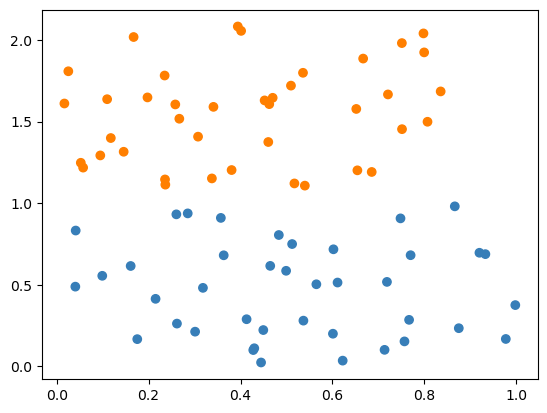

In [6]:
X, y = create_dataset()
colors = np.array(['#ff7f00', '#377eb8'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)]); plt.show()
xbounds = (X[:,0].min(), X[:,0].max())
ybounds = (X[:,1].min(), X[:,1].max())

k-Nearest Neighbours

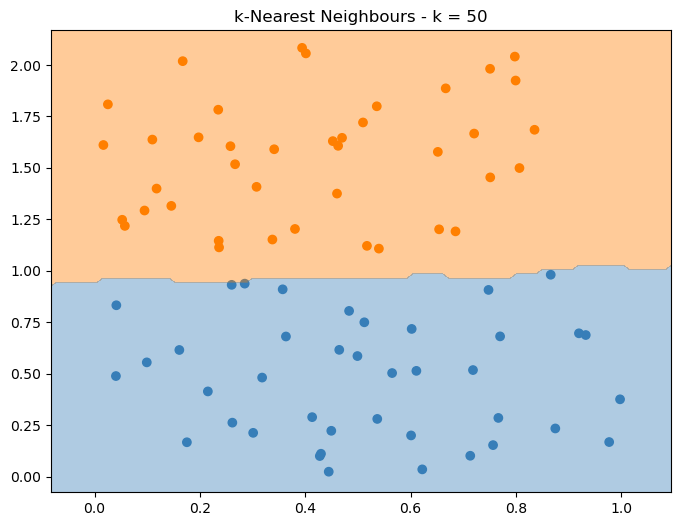

In [8]:
model = NearestNeighbours(k=50)
model.fit(X, y)

figure = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
ax.set_title("k-Nearest Neighbours - k = %d" % model.k)
decision_boundary(ax, xbounds, ybounds, colors, model, 100)
plt.show()

Nearest Neighbours with Gaussian Kernel method

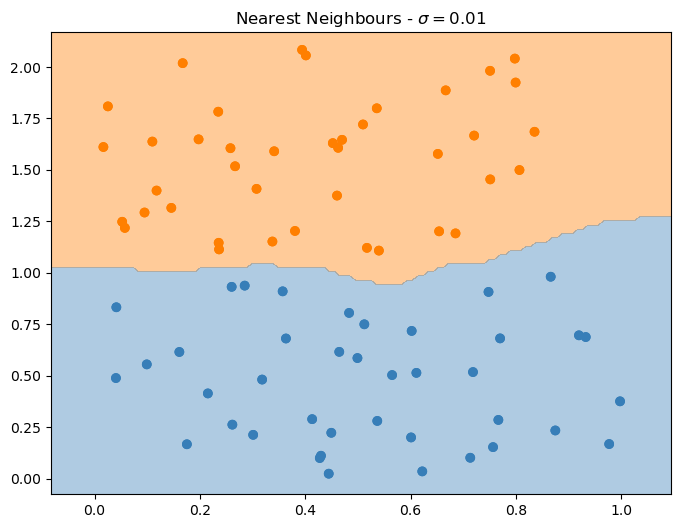

In [9]:
model_with_kernel = NearestNeighbours(gaussian_kernel=True, sigma=0.01)
model_with_kernel.fit(X, y)

figure = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
ax.set_title(r"Nearest Neighbours - $\sigma = %s$" % model_with_kernel.sigma)
decision_boundary(ax, xbounds, ybounds, colors, model_with_kernel, 100)
plt.show()